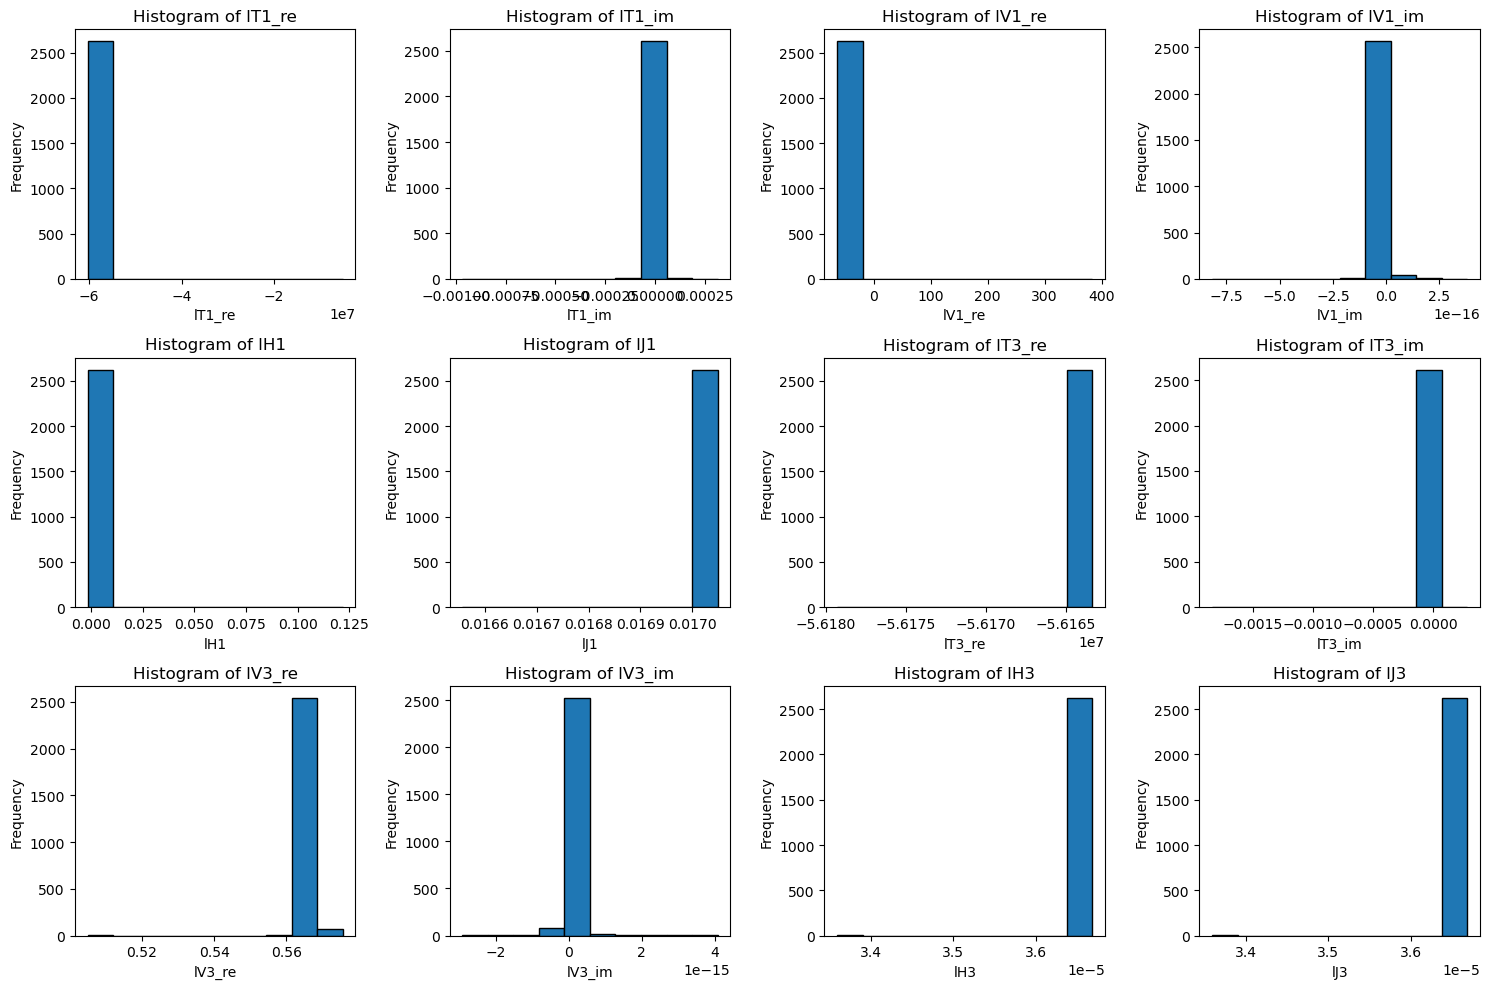


Unique values for lT1_re: [-60286402.820438 -60286402.741819 -60286402.636548 ... -60286402.597019
 -60286402.520335  -5226205.573182]

Unique values for lT1_im: [-9.66e-04 -3.15e-04 -1.48e-04 -1.45e-04 -9.90e-05 -9.40e-05 -9.10e-05
 -8.70e-05 -7.80e-05 -6.80e-05 -5.60e-05 -4.10e-05 -3.90e-05 -3.50e-05
 -3.40e-05 -3.30e-05 -2.90e-05 -2.60e-05 -2.50e-05 -2.10e-05 -2.00e-05
 -1.90e-05 -1.80e-05 -1.70e-05 -1.60e-05 -1.50e-05 -1.40e-05 -1.30e-05
 -1.20e-05 -1.10e-05 -1.00e-05 -9.00e-06 -8.00e-06 -7.00e-06 -6.00e-06
 -5.00e-06 -4.00e-06 -3.00e-06 -2.00e-06 -1.00e-06 -0.00e+00  1.00e-06
  2.00e-06  3.00e-06  4.00e-06  5.00e-06  6.00e-06  7.00e-06  8.00e-06
  9.00e-06  1.00e-05  1.10e-05  1.20e-05  1.30e-05  1.40e-05  1.50e-05
  1.60e-05  1.70e-05  1.90e-05  2.00e-05  2.20e-05  2.40e-05  2.50e-05
  2.80e-05  3.00e-05  3.10e-05  3.30e-05  4.20e-05  5.20e-05  7.00e-05
  7.10e-05  8.00e-05  9.10e-05  9.70e-05  1.11e-04  1.14e-04  1.52e-04
  1.70e-04  2.11e-04  3.12e-04]

Unique values for lV1_r

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Parameters
n = 250
chi = n
kappa = 1.0
P = 30.0
d = 25.0
b = 4 / (3 * np.pi)
epsilon = 0.03
delta = 1

# Define the system of equations with real and imaginary parts separated
def equations(vars):
    # Variables: real and imaginary parts for lT1, lV1, lT3, lV3; real for lH1, lJ1, lH3, lJ3
    lT1_re, lT1_im, lV1_re, lV1_im, lH1, lJ1, lT3_re, lT3_im, lV3_re, lV3_im, lH3, lJ3 = vars

    # Construct complex variables
    lT1 = lT1_re + 1j * lT1_im
    lV1 = lV1_re + 1j * lV1_im
    lT3 = lT3_re + 1j * lT3_im
    lV3 = lV3_re + 1j * lV3_im

    lWT = 1 / (d + delta * b * lV1 / n)
    lWP = (1/d) 
    # Intermediate calculations
    TrSigma =  lWT + lWP * (d - 1)
    EChh = lH1 + lH3 + ((8 * 6) / (np.pi * (1 + 2 * TrSigma)**3) * (lWT **3)) * (d-1) + (4 / (np.pi * (1 + 2 * TrSigma)) * lWT) * (d - 1)
    gammaYh2 = (4 / np.pi) * 1 / (1 + 2 * EChh )

    # Linear target equations
    lK1 = gammaYh2 * lH1
    eq1 = lT1 - (-chi**2 / (kappa / P + lK1)**2 * delta)
    eq2 = lV1 - (1 / lJ1**2 * lH1 - 1 / lJ1)
    eq3 = lH1 - (1 / (1 / lJ1 + gammaYh2 * lT1 / (n * chi)))
    eq4 = lJ1 - (4 / (np.pi * (1 + 2 * TrSigma)) * lWT)

    # Cubic target equations
    lK3 = gammaYh2 * lH3
    eq5 = lT3 - (-chi**2 / (kappa / P + lK3)**2 * delta)
    eq6 = lV3 - (1 / lJ3**2 * lH3 - 1 / lJ3)
    eq7 = lH3 - (1 / (lJ3**(-1) + gammaYh2 * lT3 * epsilon**2 / (n * chi)))
    eq8 = lJ3 - ((8 * 6) / (np.pi * (1 + 2 * TrSigma)**3) * (lWT **3))

    # Return real and imaginary parts of equations for complex variables, real for others
    return [
        np.real(eq1), np.imag(eq1),  # lT1
        np.real(eq2), np.imag(eq2),  # lV1
        np.real(eq3),                # lH1
        np.real(eq4),                # lJ1
        np.real(eq5), np.imag(eq5),  # lT3
        np.real(eq6), np.imag(eq6),  # lV3
        np.real(eq7),                # lH3
        np.real(eq8)                 # lJ3
    ]

# Ensemble of initial conditions
num_samples = 5000
initial_conditions = [
    (
        np.random.uniform(-1e8, 1e8),  # lT1_re
        np.random.uniform(-1e8, 1e8),  # lT1_im
        np.random.uniform(-1000, 1000),  # lV1_re
        np.random.uniform(-1000, 1000),  # lV1_im
        np.random.uniform(0, 0.2),     # lH1
        np.random.uniform(0, 0.2),     # lJ1
        np.random.uniform(-1e8, 1e8),  # lT3_re
        np.random.uniform(-1e8, 1e8),  # lT3_im
        np.random.uniform(-100, 1000),  # lV3_re
        np.random.uniform(-100, 10000),  # lV3_im
        np.random.uniform(0, 0.2),     # lH3
        np.random.uniform(0, 0.2)      # lJ3
    ) for _ in range(num_samples)
]

# Solve for each initial condition
solutions = []
for init in initial_conditions:
    sol, infodict, ier, mesg = fsolve(equations, init, full_output=True, xtol=1e-8)
    if ier == 1:  # Successful convergence
        residuals = np.abs(equations(sol))
        if np.max(residuals) < 0.01:  # Filter solutions with small residuals
            solutions.append(sol)

# Convert solutions to numpy array
solutions = np.array(solutions)
var_names = ['lT1_re', 'lT1_im', 'lV1_re', 'lV1_im', 'lH1', 'lJ1', 'lT3_re', 'lT3_im', 'lV3_re', 'lV3_im', 'lH3', 'lJ3']

# Plot histograms for all variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(var_names):
    plt.subplot(3, 4, i + 1)
    plt.hist(solutions[:, i], bins=10, edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Print unique solutions for each variable
for i, var in enumerate(var_names):
    unique_vals = np.unique(np.round(solutions[:, i], 6))
    print(f"\nUnique values for {var}: {unique_vals}")